# **Neuro RLs** [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/TomGeorge1234/NeuroRLTutorial/blob/main/NeuroRL.ipynb)
### **University of Amsterdam Neuro-AI Summer School ,2024**
#### made by: **Tom George (UCL) and Jesse Geerts (Imperial)**

In this tutorial we'll study and build reinforcement learning models inspired by the brain. 

TODO: Insert fun animation of the model we'll end up building 

## **Learning Objectives**

## **Contents** 
0. [Import dependencies and data](#dependencies)
1. [Rescorla-Wagner Model](#rescorla)
2. [Temporal Difference Learning](#td)
3. [Q-Learning](#q)
    1. [Navigating in a grid world](#grid)
4. [Deep Q-Learning](#dqn)
    1. [Neuroscience inspired basis functions](#basis)

## **0. Import dependencies and data** <a name="dependencies"></a>
Run the following code: It'll install some dependencies, download some files and import some functions. You can mostly ignore it. 

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import ratinabox
ratinabox.stylize_plots() # sets some RC params to make plots look better
# rc params to remove top and right spines from plot
from matplotlib import rcParams
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.xmargin'] = 0.05
plt.rcParams['axes.ymargin'] = 0.05
# set bounds on the x and y to match the avaiable data

# import dataclass
from dataclasses import dataclass


## 1. Rescorla-Wagner

Classical conditioning is where a neutral stimulus -- also called the _unconditioned stimulus, US_ -- is paired with a response-producing stimulus -- _the conditioned stimulus, CS_. After the association is learned, the neutral stimulus *alone* can produce the response.

The most famous example is Pavlov's dogs: Pavlov rang a bell before feeding his dogs which would cause them to salivate. After a while, the dogs would start salivating when they heard the bell, even if no food was presented.

In 1972 Rescorla and Wagner proposed a simple model to explain this learning process. The model is based on the idea that the strength of the association between the CS and US is proportional to the discrepancy between the expected and actual US.

### **1.1 Model**
Mathematically, the model is defined as follows:

$$\delta V_i = \alpha \cdot \beta_i \cdot \delta, $$

$$\delta = R - \sum_i{V_i}$$

I.e. the increment in the value of the $i^{th}$ stimulus, $\delta V_{i}$, is proportional to the discrepancy between the reward (response) that was recieved, $R$ and the value of the stimulus, $V_i$. The proportionality constant $\alpha$ is the learning rate.

**Exercise 1.1** 
1. Consider a simple example where there is only one stimulus with zero initial value. A constant reward, $R$ is given each trial. Show the value of the stimulus after the first trial is given by $V(1) = \alpha \cdot \beta_1 \cdot R$.
2. Show the value of the stimulus should _exponentially_ decay towards the reward with a time constant $\tau = \alpha \cdot \beta_1$. (_Hint: consider using the change of of variables $U(t) = R - V(t)$._)


### **1.2 Model implementation**

In [9]:
class RescorlaWagner:
    def __init__(self,
                 n_stimuli: int,     # number of stimuli
                 alpha: float = 0.1, # learning rate
                 ):
        self.n_stimuli = n_stimuli
        self.n_trials = 1
        self.alpha = alpha
        self.values = np.zeros(n_stimuli)
        self.values_history = np.array([self.values.copy()])

    def learn(self, 
              stimulus, 
              reward,
              saliency = 1.0):
        prediction = self.values[stimulus]
        error = reward - prediction
        self.values[stimulus] += self.alpha * error
        # Write the current values to the history
        self.values_history = np.vstack([self.values_history, self.values.copy()]) 
        self.n_trials += 1

    def plot(self):
        fig, ax = plt.subplots(1,1, figsize=(3,3))
        for i in range(self.n_stimuli):
            print(np.arange(self.n_trials).shape, self.values_history[:,i].shape)
            ax.scatter(np.arange(self.n_trials), self.values_history[:,i], label=f'Stimulus {i+1}')
        ax.set_xlabel('Trial')
        ax.set_ylabel('Value')
        ax.legend(frameon=False)

        return ax 

(51,) (51,)
(51,) (51,)


<Axes: xlabel='Trial', ylabel='Value'>

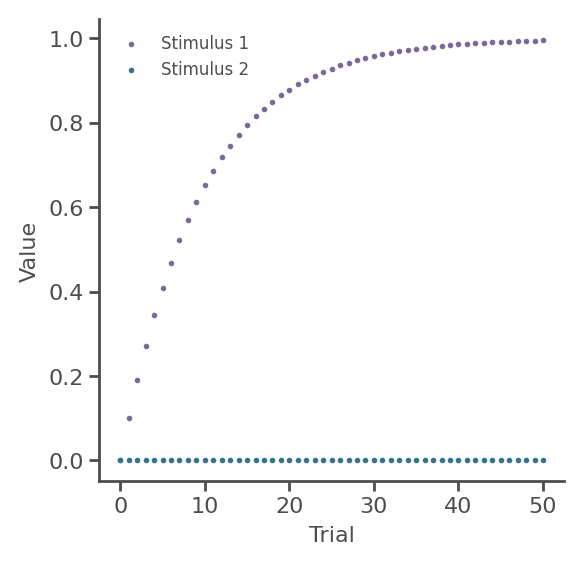

In [10]:
RW = RescorlaWagner(n_stimuli=2, alpha=0.1)

for trial in range(50):
    RW.learn(0, 1)
RW.plot()
    

We just showed the analytic solution to this was 
